## Preprocessing

In [1]:
# Import our dependencies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
application_df = pd.read_csv("/content/drive/MyDrive/Colab/Deep Learning Homework/Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [4]:
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   EIN                     34299 non-null  int64 
 1   NAME                    34299 non-null  object
 2   APPLICATION_TYPE        34299 non-null  object
 3   AFFILIATION             34299 non-null  object
 4   CLASSIFICATION          34299 non-null  object
 5   USE_CASE                34299 non-null  object
 6   ORGANIZATION            34299 non-null  object
 7   STATUS                  34299 non-null  int64 
 8   INCOME_AMT              34299 non-null  object
 9   SPECIAL_CONSIDERATIONS  34299 non-null  object
 10  ASK_AMT                 34299 non-null  int64 
 11  IS_SUCCESSFUL           34299 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 3.1+ MB


In [5]:
application_df.describe()

,EIN,STATUS,ASK_AMT,IS_SUCCESSFUL
count,3.429900e+04,34299.000000,3.429900e+04,34299.000000
mean,5.191852e+08,0.999854,2.769199e+06,0.532406
std,2.451472e+08,0.012073,8.713045e+07,0.498956
min,1.052060e+07,0.000000,5.000000e+03,0.000000
25%,2.748482e+08,1.000000,5.000000e+03,0.000000
50%,4.656317e+08,1.000000,5.000000e+03,1.000000
75%,7.526117e+08,1.000000,7.742000e+03,1.000000
max,9.960869e+08,1.000000,8.597806e+09,1.000000


In [6]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(["EIN", "NAME"], axis=1)
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [7]:
# Determine the number of unique values in each column.
for col in application_df.columns:
  if col not in ["STATUS", "ASK_AMI"]:
    print(col)
    print(len(application_df[col].value_counts()))
    print()

APPLICATION_TYPE
17

AFFILIATION
6

CLASSIFICATION
71

USE_CASE
5

ORGANIZATION
4

INCOME_AMT
9

SPECIAL_CONSIDERATIONS
2

ASK_AMT
8747

IS_SUCCESSFUL
2



In [8]:
# Look at APPLICATION_TYPE value counts for binning
application_df.APPLICATION_TYPE.value_counts()

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<function matplotlib.pyplot.show>

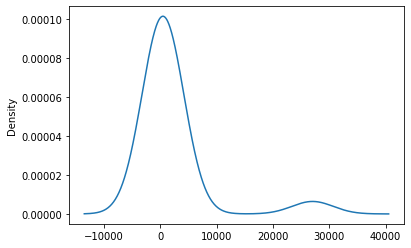

In [9]:
application_df['APPLICATION_TYPE'].value_counts().plot.kde()
plt.show

In [10]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
app_vals = application_df.APPLICATION_TYPE.value_counts() 
cutoff = 200
application_types_to_replace = list(app_vals[app_vals < cutoff].index)


# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [11]:
# Look at CLASSIFICATION value counts for binning
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C2561        1
C5200        1
C2150        1
C2170        1
C2570        1
Name: CLASSIFICATION, Length: 71, dtype: int64

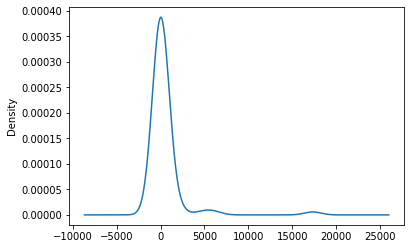

In [12]:
application_df.CLASSIFICATION.value_counts().plot.kde()
plt.show()

In [13]:
# You may find it helpful to look at CLASSIFICATION value counts >1
class_vals = application_df.CLASSIFICATION.value_counts()
class_vals[class_vals > 1]

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C2300       32
C7200       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1278       10
C1238       10
C1237        9
C1235        9
C7210        7
C1720        6
C2400        6
C4100        6
C1257        5
C1600        5
C0           3
C2710        3
C1260        3
C1256        2
C1234        2
C1267        2
C1246        2
C3200        2
Name: CLASSIFICATION, dtype: int64

In [14]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
class_vals = application_df.CLASSIFICATION.value_counts() 
cutoff = 85
classifications_to_replace = list(class_vals[class_vals < cutoff].index)

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
Other      574
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
Name: CLASSIFICATION, dtype: int64

In [15]:
# Convert categorical data to numeric with `pd.get_dummies`
application_df = pd.get_dummies(application_df)
application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,AFFILIATION_Other,AFFILIATION_Regional,CLASSIFICATION_C1000,CLASSIFICATION_C1200,CLASSIFICATION_C1270,CLASSIFICATION_C1700,CLASSIFICATION_C2000,CLASSIFICATION_C2100,CLASSIFICATION_C2700,CLASSIFICATION_C2800,CLASSIFICATION_C3000,CLASSIFICATION_C4000,CLASSIFICATION_C5000,CLASSIFICATION_C7000,CLASSIFICATION_Other,USE_CASE_CommunityServ,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0


In [16]:
# Split our preprocessed data into our features and target arrays
X = application_df.drop("IS_SUCCESSFUL", axis=1)
y = application_df.IS_SUCCESSFUL

# Split the preprocessed data into a training and testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [17]:
from sklearn.preprocessing import StandardScaler
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model#2

In [18]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
nn_model2 = tf.keras.models.Sequential()

# First hidden layer
nn_model2.add(tf.keras.layers.Dense(units=37, activation="relu", input_dim=len(X.columns)))

# Second hidden layer
nn_model2.add(tf.keras.layers.Dense(units=10, activation="tanh"))

# Third hidden layer
nn_model2.add(tf.keras.layers.Dense(units=5, activation="relu"))

# Output layer
nn_model2.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 37)                1887      
                                                                 
 dense_1 (Dense)             (None, 10)                380       
                                                                 
 dense_2 (Dense)             (None, 5)                 55        
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 2,328
Trainable params: 2,328
Non-trainable params: 0
_________________________________________________________________


In [19]:
# Compile the model
nn_model2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [20]:
# Train the model
fit_model2 = nn_model2.fit(X_train_scaled, y_train, epochs=10)

Epoch 1/10
804/804 [==============================] - 2s 2ms/step - loss: 0.5760 - accuracy: 0.7115
Epoch 2/10
804/804 [==============================] - 1s 2ms/step - loss: 0.5537 - accuracy: 0.7276
Epoch 3/10
804/804 [==============================] - 1s 2ms/step - loss: 0.5510 - accuracy: 0.7294
Epoch 4/10
804/804 [==============================] - 1s 2ms/step - loss: 0.5491 - accuracy: 0.7282
Epoch 5/10
804/804 [==============================] - 1s 2ms/step - loss: 0.5474 - accuracy: 0.7313
Epoch 6/10
804/804 [==============================] - 2s 2ms/step - loss: 0.5462 - accuracy: 0.7322
Epoch 7/10
804/804 [==============================] - 2s 2ms/step - loss: 0.5459 - accuracy: 0.7317
Epoch 8/10
804/804 [==============================] - 1s 2ms/step - loss: 0.5448 - accuracy: 0.7327
Epoch 9/10
804/804 [==============================] - 1s 2ms/step - loss: 0.5440 - accuracy: 0.7333
Epoch 10/10
804/804 [==============================] - 1s 2ms/step - loss: 0.5437 - accuracy: 0.7322

In [21]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model2.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5502 - accuracy: 0.7264 - 401ms/epoch - 1ms/step
Loss: 0.5502025485038757, Accuracy: 0.7264139652252197


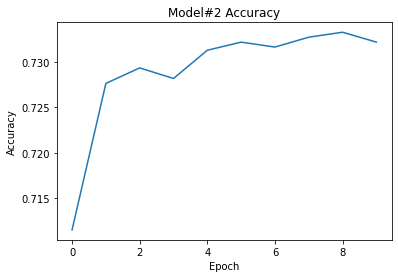

In [22]:
plt.plot(fit_model2.history['accuracy'])
plt.title('Model#2 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

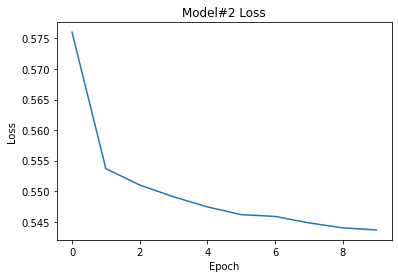

In [23]:
plt.plot(fit_model2.history['loss'])
plt.title('Model#2 Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

In [24]:
# Export our model to HDF5 file
nn_model2.save("/content/drive/MyDrive/Colab/Deep Learning Homework/model2.h5")

# Compile, Train and Evaluate the Model#3

In [25]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
nn_model3 = tf.keras.models.Sequential()

# First hidden layer
nn_model3.add(tf.keras.layers.Dense(units=25, activation="relu", input_dim=len(X.columns)))

# Second hidden layer
nn_model3.add(tf.keras.layers.Dense(units=20, activation="tanh"))

# Third hidden layer
nn_model3.add(tf.keras.layers.Dense(units=15, activation="tanh"))

# Fourth hidden layer
nn_model3.add(tf.keras.layers.Dense(units=10, activation="relu"))

# Output layer
nn_model3.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_model3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 25)                1275      
                                                                 
 dense_5 (Dense)             (None, 20)                520       
                                                                 
 dense_6 (Dense)             (None, 15)                315       
                                                                 
 dense_7 (Dense)             (None, 10)                160       
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 2,281
Trainable params: 2,281
Non-trainable params: 0
_________________________________________________________________


In [26]:
# Compile the model
nn_model3.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [27]:
# Train the model
fit_model3 = nn_model3.fit(X_train_scaled, y_train, epochs=65)

Epoch 1/65
804/804 [==============================] - 2s 2ms/step - loss: 0.5730 - accuracy: 0.7143
Epoch 2/65
804/804 [==============================] - 2s 2ms/step - loss: 0.5538 - accuracy: 0.7281
Epoch 3/65
804/804 [==============================] - 2s 2ms/step - loss: 0.5499 - accuracy: 0.7310
Epoch 4/65
804/804 [==============================] - 2s 2ms/step - loss: 0.5494 - accuracy: 0.7296
Epoch 5/65
804/804 [==============================] - 2s 2ms/step - loss: 0.5476 - accuracy: 0.7324
Epoch 6/65
804/804 [==============================] - 2s 2ms/step - loss: 0.5469 - accuracy: 0.7320
Epoch 7/65
804/804 [==============================] - 2s 2ms/step - loss: 0.5456 - accuracy: 0.7328
Epoch 8/65
804/804 [==============================] - 2s 2ms/step - loss: 0.5450 - accuracy: 0.7334
Epoch 9/65
804/804 [==============================] - 2s 2ms/step - loss: 0.5439 - accuracy: 0.7340
Epoch 10/65
804/804 [==============================] - 2s 2ms/step - loss: 0.5436 - accuracy: 0.7343

In [28]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model3.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5526 - accuracy: 0.7297 - 383ms/epoch - 1ms/step
Loss: 0.5525943040847778, Accuracy: 0.72967928647995


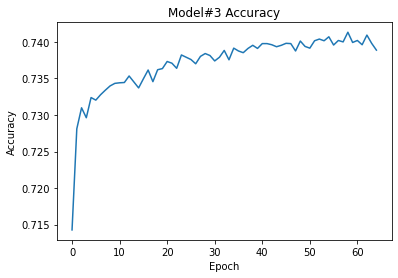

In [29]:
plt.plot(fit_model3.history['accuracy'])
plt.title('Model#3 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

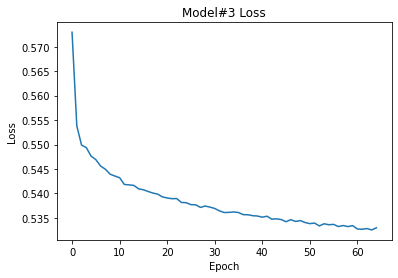

In [30]:
plt.plot(fit_model3.history['loss'])
plt.title('Model#3 Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

In [31]:
# Export our model to HDF5 file
nn_model3.save("/content/drive/MyDrive/Colab/Deep Learning Homework/model3.h5")

# Compile, Train and Evaluate the Model#4

In [32]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
nn_model4 = tf.keras.models.Sequential()

# First hidden layer
nn_model4.add(tf.keras.layers.Dense(units=21, activation="relu", input_dim=len(X.columns)))

# Second hidden layer
nn_model4.add(tf.keras.layers.Dense(units=18, activation="tanh"))

# Output layer
nn_model4.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_model4.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 21)                1071      
                                                                 
 dense_10 (Dense)            (None, 18)                396       
                                                                 
 dense_11 (Dense)            (None, 1)                 19        
                                                                 
Total params: 1,486
Trainable params: 1,486
Non-trainable params: 0
_________________________________________________________________


In [33]:
# Compile the model
nn_model4.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [34]:
# Train the model
fit_model4 = nn_model4.fit(X_train_scaled, y_train, epochs=35)

Epoch 1/35
804/804 [==============================] - 2s 2ms/step - loss: 0.5810 - accuracy: 0.7062
Epoch 2/35
804/804 [==============================] - 2s 2ms/step - loss: 0.5554 - accuracy: 0.7276
Epoch 3/35
804/804 [==============================] - 1s 2ms/step - loss: 0.5513 - accuracy: 0.7296
Epoch 4/35
804/804 [==============================] - 1s 2ms/step - loss: 0.5496 - accuracy: 0.7287
Epoch 5/35
804/804 [==============================] - 1s 2ms/step - loss: 0.5481 - accuracy: 0.7290
Epoch 6/35
804/804 [==============================] - 1s 2ms/step - loss: 0.5470 - accuracy: 0.7311
Epoch 7/35
804/804 [==============================] - 1s 2ms/step - loss: 0.5459 - accuracy: 0.7317
Epoch 8/35
804/804 [==============================] - 1s 2ms/step - loss: 0.5456 - accuracy: 0.7307
Epoch 9/35
804/804 [==============================] - 1s 2ms/step - loss: 0.5446 - accuracy: 0.7320
Epoch 10/35
804/804 [==============================] - 1s 2ms/step - loss: 0.5436 - accuracy: 0.7325

In [35]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model4.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5506 - accuracy: 0.7284 - 362ms/epoch - 1ms/step
Loss: 0.5506302118301392, Accuracy: 0.728396475315094


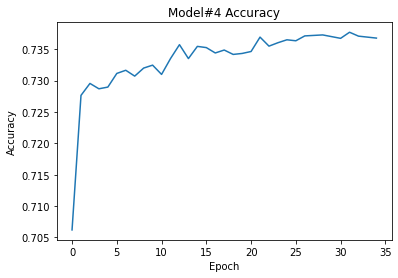

In [36]:
plt.plot(fit_model4.history['accuracy'])
plt.title('Model#4 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

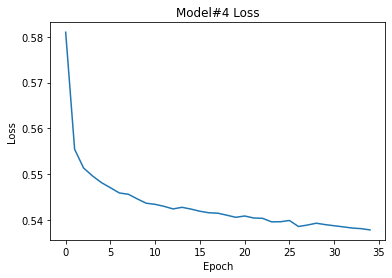

In [37]:
plt.plot(fit_model4.history['loss'])
plt.title('Model#4 Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

In [38]:
# Export our model to HDF5 file
nn_model4.save("/content/drive/MyDrive/Colab/Deep Learning Homework/model4.h5")